# Lab 5 B - Andre Piccolo - 300347025

## Import Library

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Read Data

In [92]:
df = pd.read_csv('employee.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


## Create dummy features

In [93]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

## Configuration settings

In [94]:
layer1_list=[2,5,10]
layer2_list=[0,2,5,10]
layer3_list=[0,2,5,10]

hidden_layer = []

for layer1 in layer1_list:
    for layer2 in layer2_list:
        for layer3 in layer3_list:
            if(layer3 <= layer2 & layer2 <= layer1):
                if(layer3 == 0):
                    if(layer2 == 0):
                        hidden_layer.append([layer1,])
                    else:
                        hidden_layer.append([layer1,layer2])
                else:
                    hidden_layer.append([layer1, layer2, layer3])
print(hidden_layer)

[[2], [2, 2], [2, 2, 2], [5], [5, 2], [5, 2, 2], [5, 5], [5, 5, 2], [5, 5, 5], [10], [10, 2], [10, 2, 2], [10, 5], [10, 5, 2], [10, 5, 5], [10, 10], [10, 10, 2], [10, 10, 5], [10, 10, 10]]


## Train test split

In [95]:
target=df['Attrition_Yes']
features=df.drop(['Attrition_Yes'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25)

## Create MLP models using different hidden layer

In [96]:
models=[]
scores=[]
y_preds=[]
score=[]

for layer in hidden_layer:
    models.append(MLPClassifier(learning_rate='adaptive' , max_iter=2000, hidden_layer_sizes=layer))

## Create Pipeline with different configurations for MLP classifier

In [97]:
for model in models:
    pipe = Pipeline([('scaler', MinMaxScaler()),
                     ('preprocessor', model)])
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(X_test)
    y_preds.append(y_pred)
    score.append(pipe.score(X_test, Y_test))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Find best configuration

In [98]:
res_df = pd.DataFrame(zip(hidden_layer, score), columns=['ANN Hidden Layer', 'Score'])
res_df

,ANN Hidden Layer,Score
0,[2],0.866848
1,"[2, 2]",0.869565
2,"[2, 2, 2]",0.850543
3,[5],0.864130
4,"[5, 2]",0.853261
5,"[5, 2, 2]",0.853261
6,"[5, 5]",0.834239
7,"[5, 5, 2]",0.885870
8,"[5, 5, 5]",0.847826
9,[10],0.826087


In [99]:
# Find the better configuration
best_model_position = res_df.loc[res_df['Score'].idxmax(), 'Score']
best_predict = y_preds[score.index(best_model_position)]
print("The best configuration is %s in position %d"% (res_df.loc[res_df['Score'].idxmax(), 'ANN Hidden Layer'], score.index(best_model_position)))

The best configuration is [5, 5, 2] in position 7


## Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

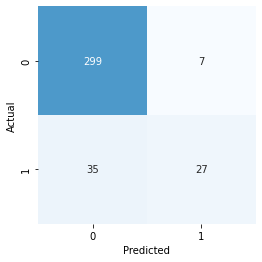

In [100]:
data = confusion_matrix(Y_test, best_predict)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True,cbar=False,
          vmax=500, square=True, fmt="d", cmap="Blues")

## Classification Report

In [101]:
print(classification_report(Y_test, best_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       306
           1       0.79      0.44      0.56        62

    accuracy                           0.89       368
   macro avg       0.84      0.71      0.75       368
weighted avg       0.88      0.89      0.87       368

